# Communication Systems 3 (ENG3014)
### Prof. D. C. Hutchings, James Watt School of Engineering, University of Glasgow
## Fourier Transform Examples from Lectures and Tutorials

In [1]:
from __future__ import division
from sympy import fourier_transform, Heaviside
from sympy import pi, cos, sin, exp, re, Abs, sinc
from sympy import symbols, Function, expand, simplify
from sympy.plotting import plot
from sympy import init_printing
init_printing(use_latex='mathjax')

a, b = symbols('a,b', constant=True, positive=True, real=True)
t, v, w = symbols('t,v,w', real=True)
f,g = symbols('f,g', cls=Function, real=True)

### lecture 04, rect function example
$$ \mathrm{rect} \frac{t}{T} = \left\{ \begin{array}{rr}  1 & |t| < \frac{T}{2}\\ 0 & |t| > \frac{T}{2} \end{array} \right. $$

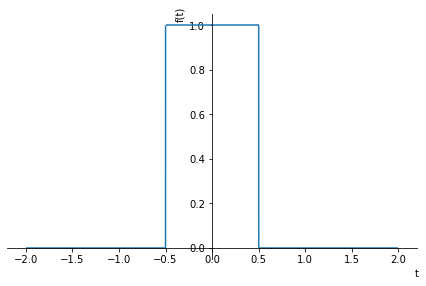

       ⎛w⎞
2.0⋅sin⎜─⎟
       ⎝2⎠
──────────
    w     

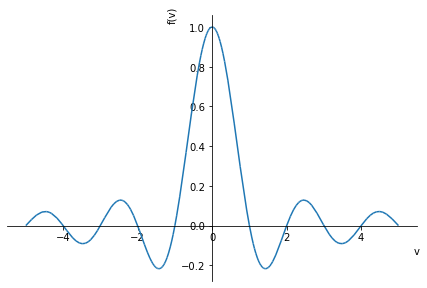

In [2]:
def f(t):
    return Heaviside(t+1/2)-Heaviside(t-1/2)
graph = plot(f(t),(t,-2,2))
spec1 = expand(fourier_transform(f(t),t,v))
display(re(spec1.replace(v, w/(2*pi))))
graph = plot(re(spec1.replace(a,1)), (v,-5,5))

### lecture 04, single-sided exponential function example
$$ u(t) \exp (-a t) = \left\{ \begin{array}{rr} 0 & t<0 \\ \exp (-a t) & t>0 \end{array} \right. $$

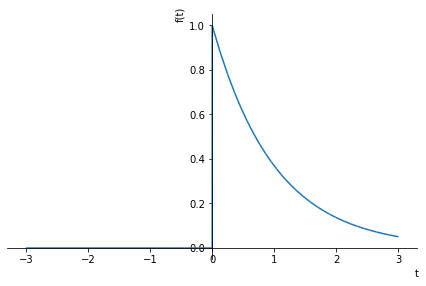

   1   
───────
a + ⅈ⋅w

In [3]:
graph = plot(Heaviside(t)*exp(-t),(t,-3,3))
spec2 = fourier_transform(Heaviside(t)*exp(-a*t),t,v)
display(spec2.replace(v, w/(2*pi)))

### lect04 gaussian pulse example
$$ \exp - \frac{t^2}{2 a^2} $$

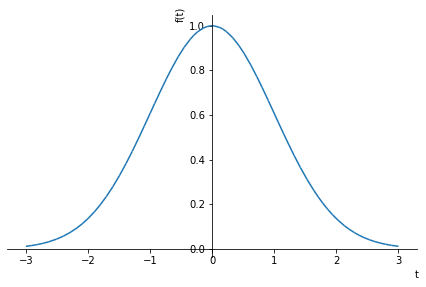

           2  2 
         -a ⋅w  
         ───────
            2   
√2⋅√π⋅a⋅ℯ       

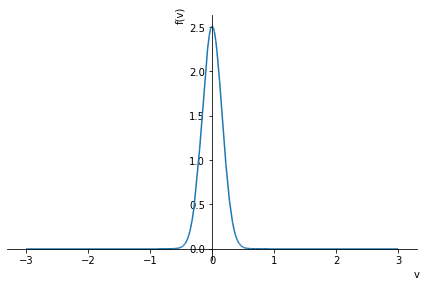

In [4]:
graph = plot(exp(-t**2/2),(t,-3,3))
spec3 = fourier_transform(exp(-t**2/(2*a**2)),t,v)
display(re(spec3.replace(v, w/(2*pi))))
graph = plot(re(spec3.replace(a,1)), (v,-3,3))

### tutorial 1, Q8

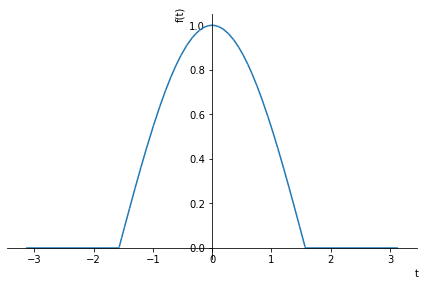

⎛  ⎛     ⅈ⋅π⋅w⋅(│w│ - 1)⎞             ⎛     ⅈ⋅π⋅w⋅(│w│ + 1)⎞          ⎞  -ⅈ⋅π⋅
⎜  ⎜     ───────────────⎟             ⎜     ───────────────⎟          ⎟  ─────
⎜  ⎜           │w│      ⎟             ⎜           │w│      ⎟          ⎟     2 
⎝- ⎝1 - ℯ               ⎠⋅(│w│ + 1) + ⎝1 - ℯ               ⎠⋅(│w│ - 1)⎠⋅ℯ     
──────────────────────────────────────────────────────────────────────────────
                             2⋅(│w│ - 1)⋅(│w│ + 1)                            

w 
──
  
  
──
  

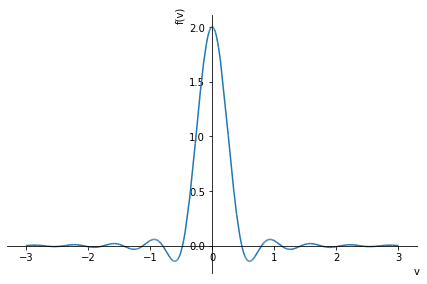

  ⎛    ⎛π⋅(w - 1)⎞       ⎛π⋅(w + 1)⎞⎞
π⋅⎜sinc⎜─────────⎟ + sinc⎜─────────⎟⎟
  ⎝    ⎝    2    ⎠       ⎝    2    ⎠⎠
─────────────────────────────────────
                  2                  

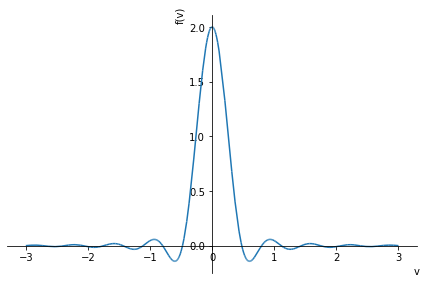

In [5]:
def g(t):
    return cos(t)*(Heaviside(t+pi/2)-Heaviside(t-pi/2))
graph = plot(g(t),(t,-pi,pi))
spec4 = fourier_transform(g(t),t,v)
display(simplify(spec4.replace(v, w/(2*pi))))
graph = plot(re(spec4), (v,-3,3))
spec4a = pi/2*(sinc((2*pi*v+1)*pi/2)+sinc((2*pi*v-1)*pi/2))
display(simplify(spec4a.replace(v, w/(2*pi))))
graph = plot(re(spec4a), (v,-3,3))

### tutorial 1, Q9

In [6]:
spec5 = fourier_transform(exp(-a*Abs(t)),t,v)
display(spec5.replace(v, w/(2*pi)))

  2⋅a  
───────
 2    2
a  + w 

### tutorial 1, Q10

In [7]:
spec6 = fourier_transform(a/pi/(t**2+a**2),t,v)
display(spec6.replace(v, w/(2*pi)))

 -a⋅w
ℯ    

### tutorial 1, Q11

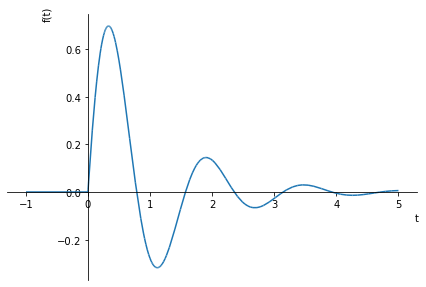

       b       
───────────────
 2            2
b  + (a + ⅈ⋅w) 

In [8]:
graph = plot(Heaviside(t)*exp(-t)*sin(4*t),(t,-1,5))
spec7 = fourier_transform(Heaviside(t)*exp(-a*t)*sin(b*t),t,v)
display(spec7.replace(v, w/(2*pi)))

### lecture 05 time-shift example

  ⎛ 2⋅ⅈ⋅w      ⅈ⋅w    ⎞  -ⅈ⋅w
ⅈ⋅⎝ℯ      - 2⋅ℯ    + 1⎠⋅ℯ    
─────────────────────────────
              w              

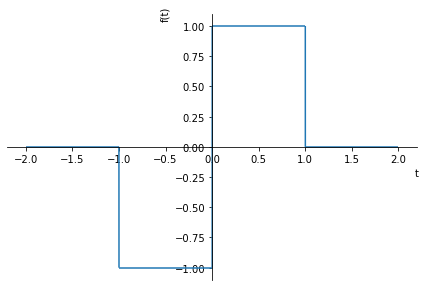

In [9]:
spec8 = fourier_transform(-Heaviside(t+1)+2*Heaviside(t)-Heaviside(t-1),t,v)
display(spec8.replace(v, w/(2*pi)))
graph = plot(-Heaviside(t+1)+2*Heaviside(t)-Heaviside(t-1),(t,-2,2))

### tutorial 1, Q12

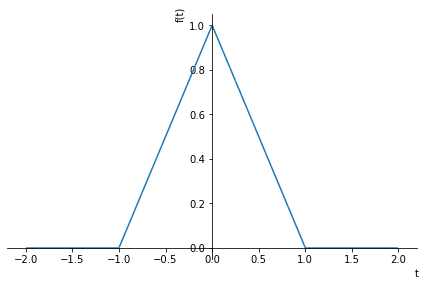

 ⎛ 2⋅ⅈ⋅w      ⅈ⋅w    ⎞  -ⅈ⋅w 
-⎝ℯ      - 2⋅ℯ    + 1⎠⋅ℯ     
─────────────────────────────
               2             
              w              

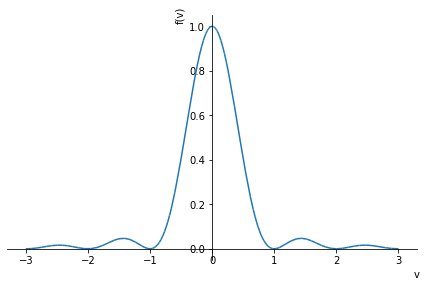

In [10]:
def f(t):
    return (1+t)*(Heaviside(t+1)-Heaviside(t))+(1-t)*(Heaviside(t)-Heaviside(t-1))
graph = plot(f(t),(t,-2,2))
spec9 = fourier_transform(f(t),t,v)
display(spec9.replace(v, w/(2*pi)))
graph = plot(spec9, (v,-3,3))